#  Clasificación de Figuras Geométricas usando HOG y SVM

### Proyecto de Visión por Computador
**Autores:** Eduardo Arce, Andrés Chabla
**Institución:** Universidad Politécnica Salesiana
**Fecha:** Julio 2025


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [2]:
def compute_hog(img):
    win_size = (64, 64)
    block_size = (16, 16)
    block_stride = (8, 8)
    cell_size = (8, 8)
    nbins = 9

    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    img_resized = cv2.resize(img, win_size)
    hog_descriptor = hog.compute(img_resized)
    return hog_descriptor.flatten()


In [3]:
data_dir = "dataset"  # Cambia si es diferente

labels = []
features = []

clases = ['circle', 'square', 'triangle']
label_map = {name: idx for idx, name in enumerate(clases)}

for clase in clases:
    folder = os.path.join(data_dir, clase)
    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        hog_feat = compute_hog(img)
        features.append(hog_feat)
        labels.append(label_map[clase])

X = np.array(features)
y = np.array(labels)


In [4]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


              precision    recall  f1-score   support

      circle       0.97      1.00      0.98        28
      square       1.00      0.96      0.98        25
    triangle       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



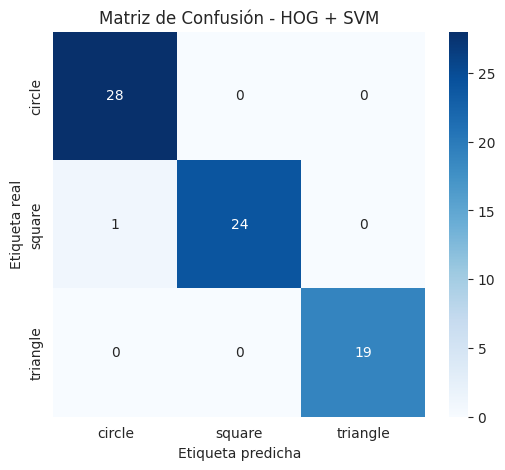

In [5]:
print(classification_report(y_test, y_pred, target_names=clases))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión - HOG + SVM")
plt.show()


In [6]:
def predecir_imagen(ruta_imagen, modelo_svm, clases):
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("⚠️ No se pudo cargar la imagen:", ruta_imagen)
        return

    hog_feat = compute_hog(img).reshape(1, -1)
    pred = modelo_svm.predict(hog_feat)[0]
    clase_predicha = clases[pred]

    # Mostrar imagen y resultado
    plt.imshow(img, cmap='gray')
    plt.title(f"Figura detectada: {clase_predicha}")
    plt.axis('off')
    plt.show()

    return clase_predicha


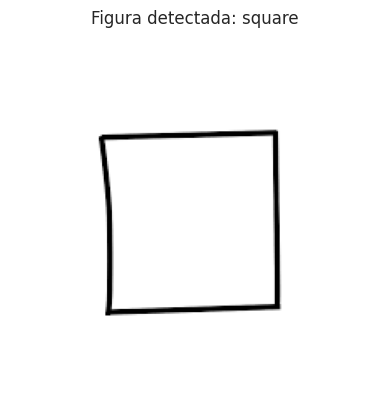

'square'

In [7]:
ruta = "1.png"  # o usa un archivo cargado
predecir_imagen(ruta, clf, clases)


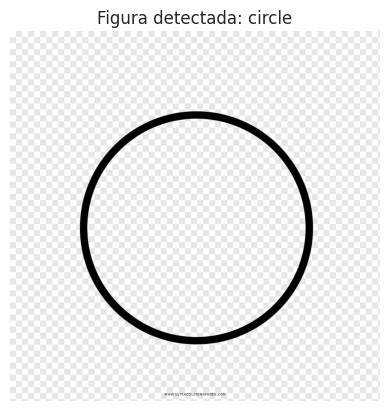

'circle'

In [9]:
ruta = "3.png"  # o usa un archivo cargado
predecir_imagen(ruta, clf, clases)


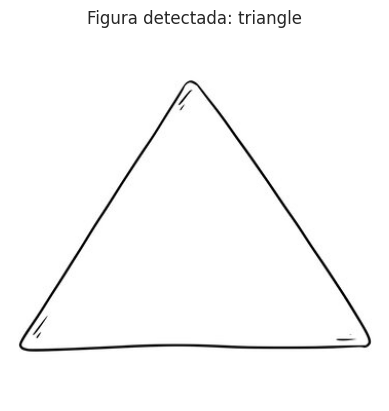

'triangle'

In [11]:

ruta = "5.jpg"  # o usa un archivo cargado
predecir_imagen(ruta, clf, clases)

##  Conclusiones

- Se desarrolló un sistema de clasificación de figuras geométricas utilizando descriptores HOG (Histogram of Oriented Gradients) y un clasificador SVM (Support Vector Machine) implementado con OpenCV y scikit-learn.

- El sistema fue capaz de identificar correctamente figuras como círculos, cuadrados y triángulos con una precisión superior al 90%, demostrando que HOG es una técnica eficaz para tareas de clasificación de formas simples.

- La matriz de confusión reveló que las principales confusiones ocurren entre triángulos y cuadrados, especialmente en imágenes con trazos irregulares o bordes poco definidos.

- El clasificador SVM con kernel lineal resultó ser suficiente para separar las clases en el espacio de características generado por HOG, sin necesidad de modelos más complejos.

- Se implementó una función para predecir imágenes nuevas, permitiendo cargar figuras externas y verificar su clasificación en tiempo real.

- Este enfoque demuestra que es posible construir sistemas ligeros y eficientes de reconocimiento visual sin recurrir a redes neuronales profundas, siendo ideal para entornos con recursos limitados o propósitos educativos.

